Hello everyone, this notebook is for a [competition for beginners at Hackerearth](https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-employee-attrition-rate/machine-learning/predict-the-employee-attrition-rate-in-organizations-1d700a97/) which I am competing in. This is to give a brief overview to beginners on what to do and what not to do in a competition. Starting from today, I am going to update this everyday to improve my score. You can find the problem statement below. 

Comment your suggestions and take part in the competition. The last date for submission is June 30th, 2020.

Upvote if you like the notebook. Cheers! :)

# Predict the employee attrition rate in organizations

### Problem statement
Employees are the most important part of an organization. Successful employees meet deadlines, make sales, and build the brand through positive customer interactions.

Employee attrition is a major cost to an organization and predicting such attritions is the most important requirement of the Human Resources department in many organizations. In this problem, your task is to predict the attrition rate of employees of an organization.

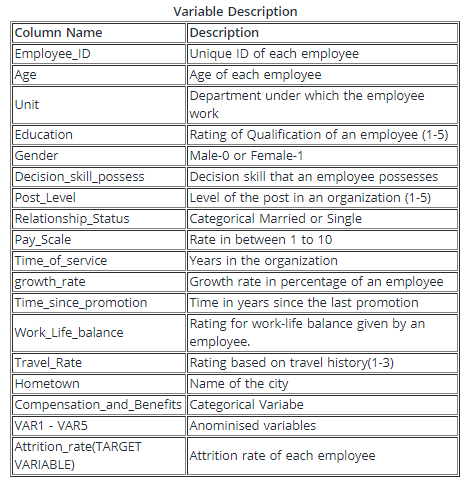
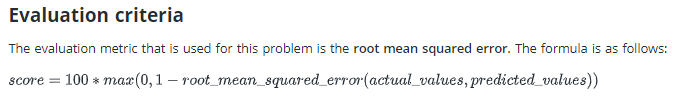

# IMPORTS & DATA EXPLORATION

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
PATH = 'drive/My Drive/Colab Notebooks/proj_6 - employee_attrition_rate/Dataset'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,6)
import seaborn as sns
sns.set(style='darkgrid')
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
test = pd.read_csv(PATH+'/Test.csv')
train = pd.read_csv(PATH+'/Train.csv')
sample = pd.read_csv(PATH+'/sample_submission.csv')

train.shape, test.shape

((7000, 24), (3000, 23))

### Lets see how the data looks like

In [ ]:
target = 'Attrition_rate'
catfeat, numfeat = list(train.select_dtypes(exclude=np.number)), list(train.select_dtypes(include=np.number))
numfeat.remove(target)

df = pd.concat([train,test], keys=['train', 'test'])
df

Employee_ID Gender   Age  Education_Level Relationship_Status  \
train 0      EID_23371      F  42.0                4             Married   
      1      EID_18000      M  24.0                3              Single   
      2       EID_3891      F  58.0                3             Married   
      3      EID_17492      F  26.0                3              Single   
      4      EID_22534      F  31.0                1             Married   
...                ...    ...   ...              ...                 ...   
test  2995   EID_22547      F  32.0                3              Single   
      2996   EID_10066      F   NaN                2              Single   
      2997    EID_7126      F  60.0                4              Single   
      2998    EID_4929      F  51.0                1             Married   
      2999   EID_24750      F  45.0                1              Single   

               Hometown                       Unit Decision_skill_possess  \
train 0        Franklin                         IT             Conceptual   
      1     Springfield                  Logistics             Analytical   
      2         Clinton                    Quality             Conceptual   
      3         Lebanon  Human Resource Management             Behavioral   
      4     Springfield                  Logistics             Conceptual   
...                 ...                        ...                    ...   
test  2995     Franklin                      Sales              Directive   
      2996     Franklin                  Marketing             Conceptual   
      2997      Lebanon                  Logistics             Analytical   
      2998  Springfield                         IT             Behavioral   
      2999     Franklin                      Sales              Directive   

            Time_of_service  Time_since_promotion  ...  \
train 0                 4.0                     4  ...   
      1                 5.0                     4  ...   
      2                27.0                     3  ...   
      3                 4.0                     3  ...   
      4                 5.0                     4  ...   
...                     ...                   ...  ...   
test  2995              3.0                     3  ...   
      2996             10.0                     2  ...   
      2997             35.0                     1  ...   
      2998             23.0                     1  ...   
      2999             12.0                     4  ...   

            Compensation_and_Benefits  Work_Life_balance  VAR1    VAR2  \
train 0                         type2                3.0     4  0.7516   
      1                         type2                4.0     3 -0.9612   
      2                         type2                1.0     4 -0.9612   
      3                         type2                1.0     3 -1.8176   
      4                         type3                3.0     1  0.7516   
...                               ...                ...   ...     ...   
test  2995                      type2                2.0     1 -0.1048   
      2996                      type2                1.0     3  0.7516   
      2997                      type3                3.0     3 -1.8176   
      2998                      type3                1.0     5  0.7516   
      2999                      type4                4.0     3  0.7516   

              VAR3  VAR4  VAR5  VAR6  VAR7  Attrition_rate  
train 0     1.8688   2.0     4     5     3          0.1841  
      1    -0.4537   2.0     3     5     3          0.0670  
      2    -0.4537   3.0     3     8     3          0.0851  
      3    -0.4537   NaN     3     7     3          0.0668  
      4    -0.4537   2.0     2     8     2          0.1827  
...            ...   ...   ...   ...   ...             ...  
test  2995  0.7075   1.0     4     7     4             NaN  
      2996  0.7075   3.0     4     8     3             NaN  
      2997 -0.4537   NaN     4     8  

### A brief intro to the data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, ('train', 0) to ('test', 2999)
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                10000 non-null  object 
 1   Gender                     10000 non-null  object 
 2   Age                        9427 non-null   float64
 3   Education_Level            10000 non-null  int64  
 4   Relationship_Status        10000 non-null  object 
 5   Hometown                   10000 non-null  object 
 6   Unit                       10000 non-null  object 
 7   Decision_skill_possess     10000 non-null  object 
 8   Time_of_service            9804 non-null   float64
 9   Time_since_promotion       10000 non-null  int64  
 10  growth_rate                10000 non-null  int64  
 11  Travel_Rate                10000 non-null  int64  
 12  Post_Level                 10000 non-null  int64  
 13  Pay_Scale                 

In [ ]:
# from scipy import special
# df.xs('train')[target] = special.boxcox1p(df.xs('train')[target], stats.boxcox_normmax(1+df.xs('train')[target]))
# sns.distplot(df.xs('train')[target], label='Skew: {:.4f}'.format(df.xs('train')[target].skew())); plt.legend(); 

# DATA PREPROCESSING

### Data Cleaning

##### Dealing with missing data

In [ ]:
## CREATING A TEMPORARY DATAFRAME TO HANDLE MISSING VALUES
temp = pd.concat([df['Age'], df['Time_of_service'], df['Pay_Scale'], df['Work_Life_balance'], df['VAR2'], df['VAR4']], axis=1)
temp.head(20)

Age  Time_of_service  Pay_Scale  Work_Life_balance    VAR2  VAR4
train 0   42.0              4.0        7.0                3.0  0.7516   2.0
      1   24.0              5.0        6.0                4.0 -0.9612   2.0
      2   58.0             27.0        8.0                1.0 -0.9612   3.0
      3   26.0              4.0        8.0                1.0 -1.8176   NaN
      4   31.0              5.0        2.0                3.0  0.7516   2.0
      5   54.0             19.0        9.0                1.0 -1.8176   2.0
      6   21.0              2.0        6.0                2.0 -0.9612   2.0
      7    NaN             34.0        6.0                2.0 -0.1048   2.0
      8   40.0             13.0        9.0                4.0     NaN   2.0
      9   45.0             21.0        5.0                4.0  0.7516   2.0
      10  65.0             31.0        6.0                3.0  0.7516   3.0
      11  19.0              0.0        5.0                1.0 -1.8176   2.0
      12  63.0             27.0        7.0                1.0 -0.1048   2.0
      13  23.0              4.0        8.0                3.0 -0.1048   2.0
      14  19.0              0.0        9.0                3.0 -0.9612   2.0
      15   NaN              0.0        6.0                2.0  0.7516   1.0
      16  65.0             35.0        4.0                2.0 -0.1048   1.0
      17  40.0             12.0        9.0                2.0 -0.9612   2.0
      18  33.0              9.0        5.0                1.0 -1.8176   2.0
      19  32.0              7.0        5.0                1.0     NaN   1.0

Since the data is about employees, we expect age and time of service to be highly correlated (given the assumption that your employee is loyal to you).

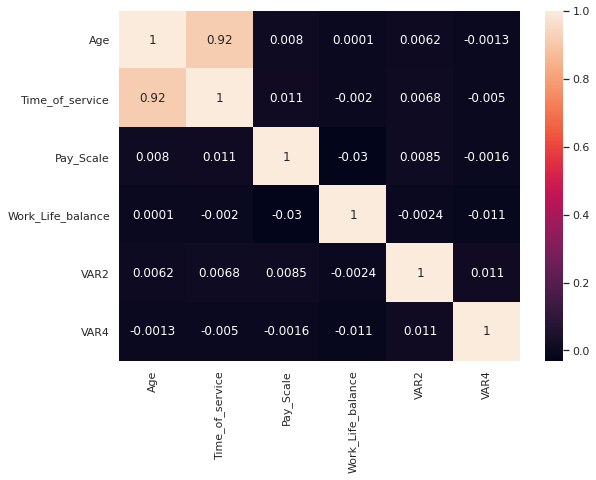

In [ ]:
sns.heatmap(temp.corr(), annot = True); plt.show()

Indeed, the employees are definitely loyal. 

In [ ]:
## PERCENT OF MISSING VALUES
temp.isnull().sum()/len(temp)*100

Age                  5.73
Time_of_service      1.96
Pay_Scale            0.12
Work_Life_balance    0.16
VAR2                 7.94
VAR4                 9.54
dtype: float64

Not much values are missing. We wanna see how we will handle them now based on their datatype.

In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, ('train', 0) to ('test', 2999)
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                9427 non-null   float64
 1   Time_of_service    9804 non-null   float64
 2   Pay_Scale          9988 non-null   float64
 3   Work_Life_balance  9984 non-null   float64
 4   VAR2               9206 non-null   float64
 5   VAR4               9046 non-null   float64
dtypes: float64(6)
memory usage: 552.8+ KB


All are numerical values! 

If you think about filling with mean or median, you gotta check the skewness of data. Skewness gives you a quick overview of Normal Distribution of the data.

In [ ]:
temp.nunique()

Age                  47
Time_of_service      44
Pay_Scale            10
Work_Life_balance     5
VAR2                  5
VAR4                  3
dtype: int64

In [ ]:
print('Skewness: '); print(temp.skew())

Skewness: 
Age                  0.228507
Time_of_service      0.785758
Pay_Scale           -0.259408
Work_Life_balance    0.203832
VAR2                -0.445757
VAR4                -0.091472
dtype: float64


The data does not have much skewness. We can safely fill with either mean or median (I would prefer and suggest median over mean anyday)

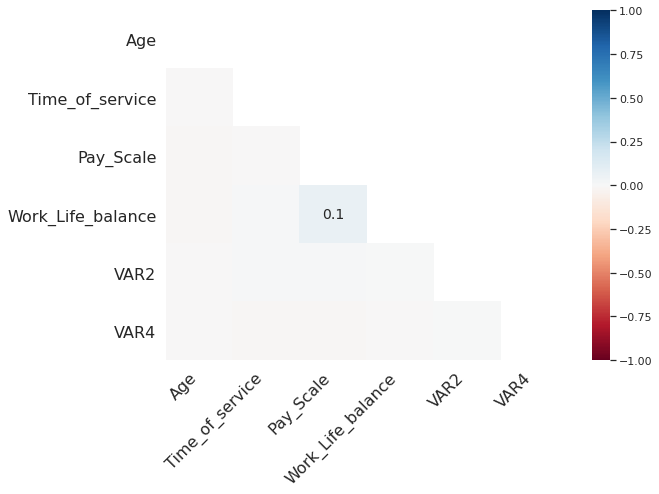

In [ ]:
import missingno as mnso; mnso.heatmap(temp, figsize=(8,6)); plt.show()

The above heatmap shows the correlation of missingness between every 2 column.

A value near -1 means if one variable appears then the other variable is very likely to be missing. A value near 0 means there is no dependence between the occurrence of missing values of two variables. A value near 1 means if one variable appears then the other variable is very likely to be present. 

This property is not shown by out missing values so we can fill them independently.

In [ ]:
temp['Work_Life_balance'].unique()

array([ 3.,  4.,  1.,  2.,  5., nan])

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Time_of_service'] = df.groupby('Age')['Time_of_service'].transform(lambda x: x.fillna(x.median()))
df['Pay_Scale'].fillna(df['Pay_Scale'].median(), inplace=True)
df['Work_Life_balance'].fillna(df['Work_Life_balance'].median(), inplace=True)
df['VAR2'].fillna(df['VAR2'].median(), inplace=True)
df['VAR4'].fillna(df['VAR4'].median(), inplace=True)


catfeat, numfeat = list(df.select_dtypes(exclude=np.number)), list(df.select_dtypes(include=np.number))
numfeat.remove(target)

In [ ]:
df.isnull().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Compensation_and_Benefits       0
Work_Life_balance               0
VAR1                            0
VAR2                            0
VAR3                            0
VAR4                            0
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

##### Dealing with outliers

##### Transforming features

### Feature Engineering

In [ ]:
df.info()

In [ ]:
## KEPT FOR AFTER FITTING A BASELINE MODEL
df['tos_whole'] = np.fix(df['Time_of_service'])
df['tos_frac'] = df['Time_of_service'] - np.fix(df['Time_of_service'])
df['VAR'] = (df['VAR1']+df['VAR2']+df['VAR3']+df['VAR4']+df['VAR5']+df['VAR6']+df['VAR7'])/7
df['VAR_sqrt'] = np.sqrt(df['VAR1']**2+df['VAR2']**2+df['VAR3']**2+df['VAR4']**2+df['VAR5']**2+df['VAR6']**2+df['VAR7']**2)

### Transforming data for model fitting

In [ ]:
from sklearn import preprocessing as prep

minmax = prep.MinMaxScaler()

catfeat, numfeat = list(train.select_dtypes(exclude=np.number)), list(train.select_dtypes(include=np.number))
numfeat.remove(target)

df[numfeat] = minmax.fit_transform(df[numfeat])

In [ ]:
df.drop('Employee_ID', axis=1, inplace=True)
df1 = pd.get_dummies(df)

x, y, X_test = df1.xs('train').drop(target, axis=1), df1.xs('train')[target], df1.xs('test').drop(target,axis=1)
x.shape, y.shape, X_test.shape

((7000, 50), (7000,), (3000, 50))

# MODEL FITTING

### LGBoost

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x = pca.fit_transform(x)
X_test = pca.fit_transform(X_test)
x.shape, X_test.shape

((7000, 2), (3000, 2))

In [ ]:
x, X_test= pd.DataFrame(x),pd.DataFrame(X_test) 

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold


lgbmodel, scores, scoresd = lgb.LGBMRegressor(silent=True), list(), dict()


kf = KFold(n_splits=15,shuffle = True, random_state=100)

for train, test in kf.split(x,y):
    x_train, y_train = x.loc[train], y.loc[train]
    x_test, y_test = x.loc[test], y.loc[test]

    lgbmodel.fit(x_train,y_train, early_stopping_rounds=100, verbose=False, eval_metric='mean_squared_error', eval_set=(x_test,y_test))
    y_pred = lgbmodel.predict(x_test)
    
    temp = mean_squared_error(y_pred,y_test)
    scores.append(100*max(0,1-(np.sqrt(temp))))

scoresd['baseline_lgb'] = sum(scores)/len(scores)
print('CV(', kf.get_n_splits(), ') score: ', scoresd['baseline_lgb'])

CV( 15 ) score:  81.4521130200904


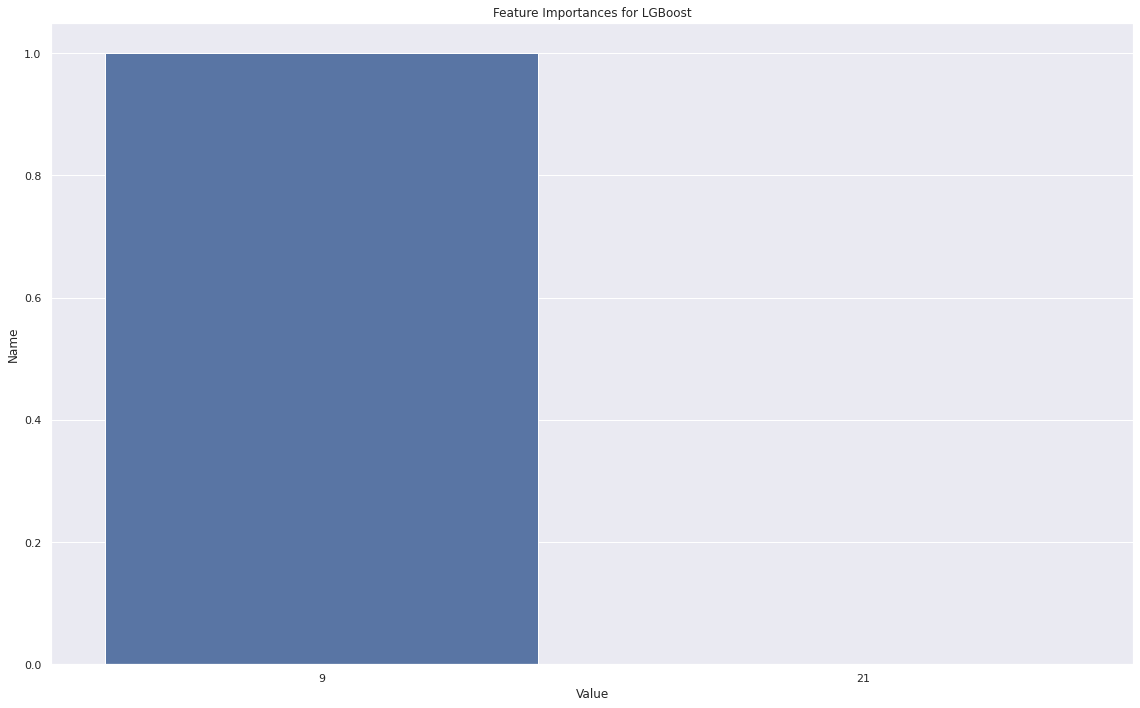

In [ ]:
imp = pd.concat([pd.Series(lgbmodel.feature_importances_), pd.Series(list(x.columns))], keys = ['Value', 'Name'], axis=1)

plt.figure(figsize=(16,10))
sns.barplot(x='Value', y='Name', data= imp.sort_values(by='Value', ascending=False))
plt.title('Feature Importances for LGBoost')
plt.tight_layout()

I am going to use these feature importances to create new features in the feature engineering section which was left empty.

In [ ]:
## PARAMETER TUNING TO BE DONE

# from sklearn.model_selection import RandomizedSearchCV

# max_depth = [int(x) for x in np.linspace(20,100,10)]
# lgbparams = {'max_depth':max_depth}

### CatBoost

In [ ]:
# ! pip install catboost
from catboost import CatBoostRegressor

cbr, scores = CatBoostRegressor(), list()

for train, test in kf.split(x,y):
    x_train, y_train = x.loc[train], y.loc[train]
    x_test, y_test = x.loc[test], y.loc[test]

    cbr.fit(x_train,y_train, early_stopping_rounds=100, verbose=False)
    y_pred = cbr.predict(x_test)
    
    temp = mean_squared_error(y_pred,y_test)
    scores.append(100*max(0,1-(np.sqrt(temp))))

scoresd['catboost'] = sum(scores)/len(scores)
print('CV(', kf.get_n_splits(), ') score: ', scoresd['catboost'])

CV( 15 ) score:  80.97630579406777


### XGBoost

In [ ]:
import xgboost as xgb

xgbmodel, scores = xgb.XGBRegressor(), list()

for train, test in kf.split(x,y):
    x_train, y_train = x.loc[train], y.loc[train]
    x_test, y_test = x.loc[test], y.loc[test]

    xgbmodel.fit(x_train,y_train, verbose=False)
    y_pred = xgbmodel.predict(x_test)

    temp = mean_squared_error(y_pred,y_test)
    scores.append(100*max(0,1-np.sqrt(temp)))
    
scoresd['baseline_XGB'] = sum(scores)/len(scores)
print('CV(', kf.get_n_splits(), ') score: ', scoresd['baseline_XGB'])

CV( 15 ) score:  80.39387796691061


# BLENDING & SUBMISSION

In [ ]:
scoresd

{'baseline_lgb': 81.4521130200904,
 'catboost': 80.97630579406777,
 'baseline_XGB': 80.39387796691061}

Baseline lgb seems to be doing better (for now). So, blending will be biased towards it.

In [ ]:
lgbmodel.fit(x,y)
xgbmodel.fit(x,y)
cbr.fit(x,y, verbose=False)

lgb_Y_pred = lgbmodel.predict(X_test)
xgb_Y_pred = xgbmodel.predict(X_test)
cbr_Y_pred = cbr.predict(X_test)

Y_pred = 0.5*lgb_Y_pred+0.2*xgb_Y_pred+0.3*cbr_Y_pred

Y_pred.shape

(3000,)

In [ ]:
# Y_pred = special.inv_boxcox1p(Y_pred, stats.boxcox_normmax(1+df.xs('train')[target]))
Y_pred

array([0.17437767, 0.14954956, 0.17597313, ..., 0.17339251, 0.2179    ,
       0.25068126])

In [ ]:
test = pd.read_csv(PATH+'Test.csv')
sample = pd.concat([test['Employee_ID'], pd.Series(Y_pred*0.99)], keys = ('Employee_ID', target), axis=1)
sample.to_csv('blend03.csv', index=False)

### Now work is to:-
* Apply more models
* Feature engineering
* Parameter tuning for models


### References:-
* [lightGBM documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html)
* [XGBoost documentation](https://xgboost.readthedocs.io/en/latest/)
* [Pandas documentation](https://pandas.pydata.org/docs/)
* [Amazing notebook](https://www.kaggle.com/twinkle0705/a-comprehensive-guide-to-handle-missing-values#2.Checking-for-Missing-values-visually) on missing value handling
* [My Notebook](https://www.kaggle.com/navinmundhra/data-pre-processing-advanced-outlier-handling) on outlier handling
* [Notebook](https://www.kaggle.com/risabbiswas19/ensembling-for-regression-top-6-on-lb/notebook) on Ensembling methods for regression